First, a few modules have to be loaded.

In [1]:
# %load ../ionsrcopt/load_data.py
import pandas as pd
import numpy as np

def read_data_from_csv(filename, cols_to_read, rows_to_read):
    """ Read a csv file into a DataFrame

    Parameters:
        filename (string): Filename
        cols_to_read (list of string): The column names to read, None if everything should be read
        rows_to_read (list of int): The rown numbers to read, None if everything should be read

    Returns:
        DataFrame
    """

    print("Loading data from csv file \'{}\'".format(filename))
    if cols_to_read is None:
        df = pd.read_csv(filename).fillna(method='ffill')
    else:
        df = pd.read_csv(filename, usecols=cols_to_read).fillna(method='ffill')

    if rows_to_read is None:
        return df
    else:
        return df.iloc[rows_to_read]

def convert_column(df, column, type):
    """ Converts the dtype of a column

    Parameters:
        df (DataFrame): The DataFrame containing the column
        column (string): The column name
        type (string): dtype the column should be converted to

    Returns:
        DataFrame: The altered DataFrame or the old one, if it did not contain the specified column
    """

    if column in df.columns:
        print("Converting column \'{}\' to \'{}\'".format(column, type))
        return df.astype({column:type})
    else:
        print("Column \'{}\' does not exist".format(column))
        return df

def convert_column_types(df):
    """ Convert all columns of a Dataframe of measurements to single precision values.

    Parameters:
        df (DataFrame): DataFrame to be altered

    Returns:
        DataFrame
    """

    print("Started type conversion of columns...")
    df = convert_column(df, 'IP.NSRCGEN:BIASDISCAQNV', 'float32')
    df = convert_column(df, 'IP.NSRCGEN:GASSASAQN', 'float32')
    df = convert_column(df, 'IP.NSRCGEN:SOURCEHTAQNI', 'float32')
    df = convert_column(df, 'IP.SAIREM2:FORWARDPOWER', 'float32')
    df = convert_column(df, 'IP.SOLCEN.ACQUISITION:CURRENT', 'float32')
    df = convert_column(df, 'IP.SOLEXT.ACQUISITION:CURRENT', 'float32')
    df = convert_column(df, 'IP.SOLINJ.ACQUISITION:CURRENT', 'float32')
    df = convert_column(df, 'ITF.BCT15:CURRENT', 'float32')
    df = convert_column(df, 'ITF.BCT25:CURRENT', 'float32')
    df = convert_column(df, 'ITH.BCT41:CURRENT', 'float32')
    df = convert_column(df, 'ITL.BCT05:CURRENT', 'float32')
    return df


def set_BCT25_current_none(df, condition):
    df['ITF.BCT25:CURRENT'] = np.select([condition], [np.nan], [df['ITF.BCT25:CURRENT']])

def clean_data(df):
    """ Clean the data of measurements, that are outliers, e.g. spikes in the extraction current.

    Parameters:
        df (DataFrame): DataFrame containing the measurements.

    Returns:
        DataFrame: Cleaned data.
    """

    print("Filtering data...")
    #df.dropna(inplace=True)
    if 'ITF.BCT15:CURRENT' in df.columns:
        #df.drop(df[df['ITF.BCT15:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, 'ITF.BCT15:CURRENT', lambda x: x < 0)  
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT15:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'ITF.BCT25:CURRENT' in df.columns:
        #df.drop(df[df['ITF.BCT25:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, df['ITF.BCT25:CURRENT'] < 0)
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT25:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'ITH.BCT41:CURRENT' in df.columns:
        #df.drop(df[df['ITH.BCT41:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, df['ITH.BCT41:CURRENT'] < 0)
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT41:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'ITL.BCT05:CURRENT' in df.columns:
        #df.drop(df[df['ITL.BCT05:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, df['ITL.BCT05:CURRENT'] < 0)
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT05:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'IP.NSRCGEN:OVEN1AQNP' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:OVEN1AQNP'] < 4.5].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:OVEN1AQNP'] < 4.5)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:OVEN1AQNP'].apply(lambda x: np.nan if x < 4.5 else x)
    if 'IP.SOLEXT.ACQUISITION:CURRENT' in df.columns:
        #df.drop(df[df['IP.SOLEXT.ACQUISITION:CURRENT'] < 1200].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.SOLEXT.ACQUISITION:CURRENT'] < 1200)
        df['ITF.BCT25:CURRENT'] = df['IP.SOLEXT.ACQUISITION:CURRENT'].apply(lambda x: np.nan if x < 1200 else x)
    if 'IP.NSRCGEN:BIASDISCAQNV' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:BIASDISCAQNV'] == 0].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:BIASDISCAQNV'] == 0)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:BIASDISCAQNV'].apply(lambda x: np.nan if x == 0 else x)
    if 'IP.SAIREM2:FORWARDPOWER' in df.columns:
        #df.drop(df[df['IP.SAIREM2:FORWARDPOWER'] < 500].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.SAIREM2:FORWARDPOWER'] < 500)
        df['ITF.BCT25:CURRENT'] = df['IP.SAIREM2:FORWARDPOWER'].apply(lambda x: np.nan if x < 500 else x)
    if 'IP.NSRCGEN:SOURCEHTAQNI' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:SOURCEHTAQNI'] > 2.5].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:SOURCEHTAQNI'] > 2.5)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:SOURCEHTAQNI'].apply(lambda x: np.nan if x > 2.5 else x)
    if 'IP.NSRCGEN:SOURCEHTAQNI' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:SOURCEHTAQNI'] < 0.5].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:SOURCEHTAQNI'] < 0.5)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:SOURCEHTAQNI'].apply(lambda x: np.nan if x < 0.5 else x)
    
    return df

In [2]:
# %load ../ionsrcopt/histogram_clustering.py
import pandas as pd
import numpy as np
import itertools
from statsmodels.stats.weightstats import DescrStatsW

def generate_density_histogram(df, columns, bins):
    """ From the supplied data generates a histogram, where the value of each bin indicates how many items lay inside, in percent. I.e summing over the whole histogram yields 1.

    Parameters:
        df (DataFrame)
        columns (list of string): The column name of which the joint histogram should be created
        bins (list): See numpy.histogramdd for more information

    Returns:
        H (multidimensional nparray): The values of every bin
        edges (list of nparray): Edges of the bins in every dimension
    """

    H, edges = np.histogramdd(df[columns].values, bins=bins, density=True)

    normalization_factor = np.prod([abs(edges[i][1] - edges[i][0]) for i in range(len(bins))])
    H = H * normalization_factor
    return H, edges

# Nearest neighbour clustering
def do_BFS_step(p, clusters, current_cluster, bins, histogram_values, threshold):
    """ One step of BFS. A bin in the histogram is considered a node in the underluying graph, if its value is above a certain threshold.

    Parameters:
        p (tuple of int): Histogram coordinates of the currently expanded node
        clusters (nparray): For each bin, indicating which cluster it belongs to. -1 if none. Gets altered if the bin at p is found to be in a cluster. Same dimension as histogram.
        current_cluster (int): index of the currently searched cluster
        bins (list)
        histogram_values (nparray): Histogram values
        threshold (double): Every bin below this threshold will be discarded as noise

    Returns
        list of tuple of int: All children of p, but not necessarily nodes in the underlying graph.
    """

    result = []
    if clusters[p] >= 0 or histogram_values[p] < threshold: # Node has to be ignored. Else assign to cluster and find children.
        return result
    
    clusters[p] = current_cluster
    for i in range(len(p)):
        if p[i] > 0:
            child = list(p)
            child[i] -= 1
            result.append(tuple(child))
        if p[i] + 1 < bins[i]:
            child = list(p)
            child[i] += 1
            result.append(tuple(child))
    return result

def nearest_neighbour_clustering(histogram_values, bins, density_threshold):
    """ Searches for clusters in the given histogram, where all bins with a density below the threshold are discarded as noise. For clustering BFS is used, i.e. clusters are connected components of the underlying graph.

    Parameters:
        histogram_values (nparray): The values of every bin.
        bins (list)
        density_threshold (double): Every bin below this threshold will be discarded as noise

    Returns:
        int: Number of clusters found
        nparray of int: For every bin in the histogram, returns which cluster it belongs to, or -1 if none.
    """

    clusters = np.ones(bins)
    clusters *= -1
    current_cluster = 0

    l = [range(b) for b in bins]
    perms = list(itertools.product(*l))
    for p in perms:
        if clusters[p] >= 0 or histogram_values[p] < density_threshold:
            continue
        
        print("Started search for cluster {}".format(current_cluster))
        nodes_to_check = do_BFS_step(p, clusters, current_cluster, bins, histogram_values, density_threshold)
        while len(nodes_to_check) > 0:
            node = nodes_to_check.pop(0)
            nodes_to_check.extend(do_BFS_step(tuple(node), clusters, current_cluster, bins, histogram_values, density_threshold))
        
        current_cluster += 1

    print("Found {} cluster(s)".format(current_cluster))
    return current_cluster, clusters

def create_cluster_frame(histogram_edges, histogram_values, bins, clusters, columns, cluster_column_name='CLUSTER'): 
    """ Constructs a Data Frame from a histogram and cluster results

    Parameters:
        histogram_edges (list of nparray): Edges of the bins in every dimension
        histogram_values (nparray): The values of every bin.
        bins (list)
        clusters (list of int): cluster, to which every bin belongs to
        columns (list of string): column names of clustered data
        cluster_column_name (string): column name of the cluster result

    Returns:
        DataFrame: A frame that contains density and cluster information about every bin
    """
    
    l = [range(b) for b in bins]
    perms = list(itertools.product(*l))
    values = [[(histogram_edges[i][perm[i]] + histogram_edges[i][perm[i]+1])*0.5 for i in range(len(bins))] + [histogram_values[perm], clusters[perm]] for perm in perms]
    clustered = pd.DataFrame(values, columns=columns + ['DENSITY', cluster_column_name])
    return clustered


def describe_cluster(cluster, columns):
    """ Generate descriptive statistics for a cluster

    Parameters:
        cluster (DataFrame): A dataframe, that contains density informations for every bin in the cluster
        columns (list of string): The names of the columns for which to generate statistics

    Returns: 
        Series: All statistics for the selected columns
    """

    values = cluster.values
    dstats = DescrStatsW(values, cluster['DENSITY'].values if len(values) > 1 else None)
    mean = dstats.mean
    std = dstats.std
    quantiles = dstats.quantile(0.5, return_pandas=False)
    
    result_columns = [[mean[i], std[i], std[i] / abs(mean[i]) * 100, cluster[columns[i]].min(), quantiles[0][i], cluster[columns[i]].max()] for i in range(len(columns))]
    result = list(itertools.chain(*result_columns)) + [cluster['DENSITY'].count(), cluster['DENSITY'].sum() * 100]
    
    value_columns = [[(col, 'mean'), (col, 'std'), (col, 'varC (%)'), (col, 'min'), (col, 'median'), (col, 'max')] for col in columns]
    index = list(itertools.chain(*value_columns)) + [('DENSITY', 'count'), ('DENSITY', 'total')]
    
    return pd.Series(result, index=pd.MultiIndex.from_tuples(index))


def describe_clusters(df, columns):
    """ Summarize all clusters and sort them by density

    Parameters:
        df (DataFrame): A frame containing density and cluster information about every bin
        columns (list of string): The names of the columns for which to generate statistics
    
    Returns:
        DataFrame: Descriptive frame sorted by density
    """

    result = df[columns + ['CLUSTER']].groupby('CLUSTER').apply(describe_cluster, columns)
    return result.sort_values(('DENSITY', 'total'), ascending=0)

In [3]:
# %load ../ionsrcopt/source_stability.py
import pandas as pd
import numpy as np

def stability_mean_variance_classification(df, current_column, sliding_window_size=5000, minimum_mean=0.025, maximum_variance=0.00005):
    """ Classifies all point in the data frame into the categories source stable/unstable, based on a rolling window and a minimum mean and maximum variance in this window.

    Parameters:
        df (DataFrame): The data input loaded as a DataFrame
        current_column (string): name of the column that contains the beam current we are interested in, typically BCT25
        sliding_window_size (int): size of the sliding window, by default 5000 (100 Minutes of data every 1.2 seconds)
        minimum_mean (double): minimal intensity of the beam in the sliding window for it to be considered stable
        maximum_variance (double): maximum variance of intensity of the beam in the sliding window for it to be considered stable

    Returns:
        Series: A series that for every data point indicates if the source was running stable or not (1 is stable, 0 is unstable)
    """

    mean = np.array(df[current_column].rolling(sliding_window_size).mean())
    var = np.array(df[current_column].rolling(sliding_window_size).var())

    result = [int(m > minimum_mean and v < maximum_variance) if not np.isnan(m) and not np.isnan(v) else np.nan for (m, v) in zip(mean, var)]
    return pd.Series(result, index=df.index)

#### Biasdisc vs Gas vs Central Current
We will now apply the histogram clustering method to look for clusters in these three parameterspaces.

First we load the data from Nov 2018 and convert the datatypes to single precision numbers, in order to save memmory.

In [4]:
df = read_data_from_csv('../Data_Raw/Nov2018.csv', ['IP.NSRCGEN:BIASDISCAQNV', 'IP.NSRCGEN:GASSASAQN', 'IP.SOLCEN.ACQUISITION:CURRENT', 'IP.SAIREM2:FORWARDPOWER', 'ITF.BCT25:CURRENT'], None)
df = convert_column_types(df)
#df = clean_data(df)
df.shape

Loading data from csv file '../Data_Raw/Nov2018.csv'
Started type conversion of columns...
Converting column 'IP.NSRCGEN:BIASDISCAQNV' to 'float32'
Converting column 'IP.NSRCGEN:GASSASAQN' to 'float32'
Column 'IP.NSRCGEN:SOURCEHTAQNI' does not exist
Converting column 'IP.SAIREM2:FORWARDPOWER' to 'float32'
Converting column 'IP.SOLCEN.ACQUISITION:CURRENT' to 'float32'
Column 'IP.SOLEXT.ACQUISITION:CURRENT' does not exist
Column 'IP.SOLINJ.ACQUISITION:CURRENT' does not exist
Column 'ITF.BCT15:CURRENT' does not exist
Converting column 'ITF.BCT25:CURRENT' to 'float32'
Column 'ITH.BCT41:CURRENT' does not exist
Column 'ITL.BCT05:CURRENT' does not exist


(2895824, 5)

We have roughly 2.9 million data points.

Next, we classify the stability of the source for every point, and afterwards we can clean the data. 

In [5]:
df['stability_mean_variance_classification'] = stability_mean_variance_classification(df, 'ITF.BCT25:CURRENT', sliding_window_size=5000, minimum_mean=0.027, maximum_variance=0.000035)

In [6]:
df.dropna(inplace=True)

To be able to better work with the classified data, we create two seperate frames.

In [7]:
df_stable = df[df['stability_mean_variance_classification'] == 1].copy()
df_unstable = df[df['stability_mean_variance_classification'] == 0].copy()

And now set the columns we are interested in.

In [8]:
cols_to_cluster = ['IP.NSRCGEN:BIASDISCAQNV', 'IP.NSRCGEN:GASSASAQN', 'IP.SOLCEN.ACQUISITION:CURRENT']

### Clustering
#### Stable source
Now, we can begin with the search for clusters in the parameters in the case of a *stable* source. As we use an algorithm that works with histograms, we need to set the number of bins first. Right now, these ar still somewhat arbitrary and chosen to have a decent resolution while not having to many bins. Then the histogram is beeing calculated. We use a density based count, so the value of a bin indicates what percentage of data lies within it.

In [108]:
bins = [100, 100, 100]
H_stable, edges_stable = generate_density_histogram(df_stable, cols_to_cluster, bins)

All bins below a certain threshold will be ignored and every datapoint inside considered as noise. As threshold we now use the mean density plus one standard deviation, what garanties that only bins with a relatively big mass are considered. This is a parameter that might need to be readjusted in higher dimensions, as the number of bins increases exponentially.

In [109]:
hist_mean = np.mean(H_stable)
hist_std = np.std(H_stable)
threshold = hist_mean+hist_std
threshold

0.00011407546920341102

Now the clustering algorithm can be run and afterwards a dataframe that contains all the information is created.

In [117]:
num_clusters, clusters = nearest_neighbour_clustering(H_stable, bins, threshold)
cl_df = create_cluster_frame(edges_stable, H_stable, bins, clusters, cols_to_cluster)

Started search for cluster 0
Started search for cluster 1
Started search for cluster 2
Started search for cluster 3
Started search for cluster 4
Started search for cluster 5
Started search for cluster 6
Started search for cluster 7
Started search for cluster 8
Started search for cluster 9
Started search for cluster 10
Started search for cluster 11
Started search for cluster 12
Started search for cluster 13
Started search for cluster 14
Started search for cluster 15
Started search for cluster 16
Started search for cluster 17
Started search for cluster 18
Started search for cluster 19
Started search for cluster 20
Started search for cluster 21
Started search for cluster 22
Started search for cluster 23
Started search for cluster 24
Started search for cluster 25
Started search for cluster 26
Started search for cluster 27
Started search for cluster 28
Started search for cluster 29
Started search for cluster 30
Started search for cluster 31
Started search for cluster 32
Started search for c

For visualization purposes we will draw a sample of _10000_ values from the data and display to which of the clusters the points belong.

In [118]:
def binary_search_edge(edges, value):
    l=0
    r=len(edges)-1
    if value < edges[l] or value > edges[r]:
        return -1

    while r-l > 1:
        m = int((l+r)*0.5)
        if value == edges[m]:
            return m
        elif value < edges[m]:
            r = m
        else:
            l = m

    return l

def find_corresponding_cluster(x, clusters, edges, num_cols):
    indices = tuple([binary_search_edge(edges[i], x[i]) for i in range(num_cols)])
    return clusters[indices]

df_stable_sample = df_stable.sample(10000)
df_stable_sample['CLUSTER'] = [find_corresponding_cluster(x, clusters, edges_stable, len(cols_to_cluster)) for x in df_stable_sample[cols_to_cluster].values]

<IPython.core.display.Javascript object>


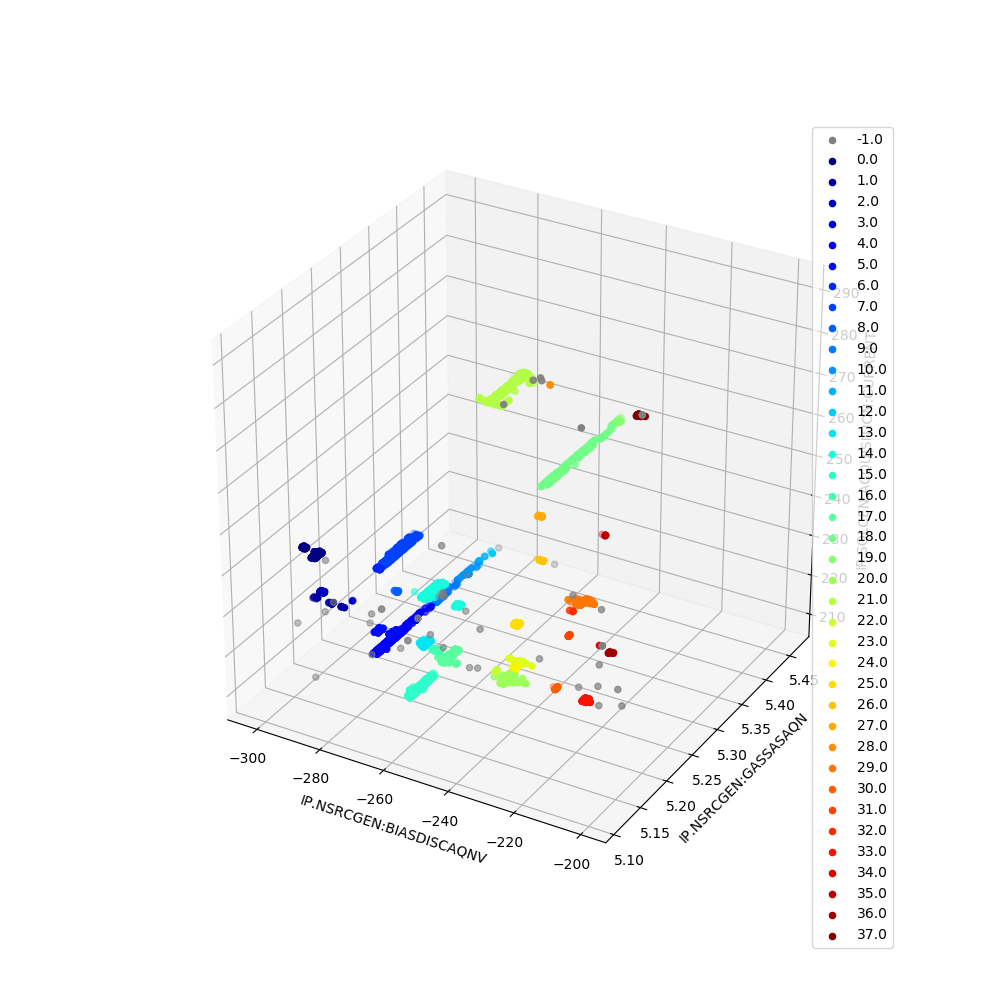

In [119]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('jet', num_clusters)
cmap.set_under('gray')
cmap.set_over('gray')

norm = mpl.colors.Normalize(vmin=0, vmax=num_clusters)
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for (name, group) in df_stable_sample.groupby('CLUSTER'):
    cax = ax.scatter(group[cols_to_cluster[0]], group[cols_to_cluster[1]], group[cols_to_cluster[2]], marker='o', c=[scalarMap.to_rgba(name)], label=name)

plt.legend() 
    
ax.set_xlabel(cols_to_cluster[0])
ax.set_ylabel(cols_to_cluster[1])
ax.set_zlabel(cols_to_cluster[2])

plt.show()

We can see that a lot of clusters were found, the grey points correspond to noise. From this point it is very hard to see what 'important' clusters are, because of the huge amount of data. We will address this problem below, where we only show the *heaviest five* clusters and everything else as noise. For statistics about these clusters, e.g. their mean, standard deviation, or density, the table below can be consultated.

In [120]:
described = describe_clusters(cl_df, cols_to_cluster).round(3)

In [121]:
num_of_top_clusters = 5
top_clusters = list(described.head(n=num_of_top_clusters).index)
top_clusters.sort()
df_stable_sample.loc[df_stable_sample['CLUSTER'].isin(top_clusters) == False, 'CLUSTER'] = -1

<IPython.core.display.Javascript object>


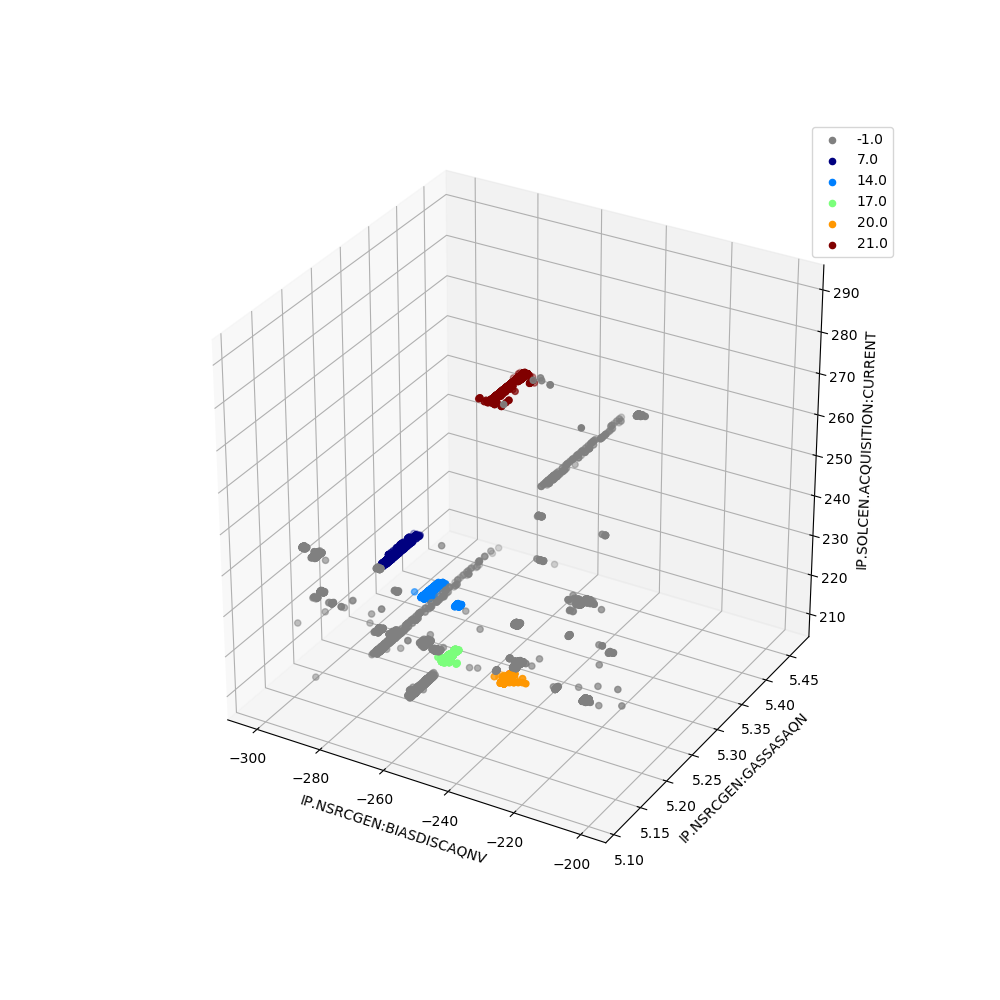

In [122]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('jet', num_of_top_clusters)
cmap.set_under('gray')
cmap.set_over('gray')

norm = mpl.colors.Normalize(vmin=0, vmax=num_of_top_clusters)
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for (name, group) in df_stable_sample.groupby('CLUSTER'):
    lookup = top_clusters.index(name) if name in top_clusters else -1
    cax = ax.scatter(group[cols_to_cluster[0]], group[cols_to_cluster[1]], group[cols_to_cluster[2]], marker='o', c=[scalarMap.to_rgba(lookup)], label=name)

plt.legend() 
    
ax.set_xlabel(cols_to_cluster[0])
ax.set_ylabel(cols_to_cluster[1])
ax.set_zlabel(cols_to_cluster[2])

plt.show()

In [87]:
described.drop(('DENSITY', 'count'), axis=1).head(n=5)

IP.NSRCGEN:BIASDISCAQNV                                             \
                           mean    std varC (%)      min   median      max   
CLUSTER                                                                      
21.0                   -236.791  0.380    0.160 -239.915 -236.805 -233.695   
14.0                   -255.470  2.976    1.165 -261.685 -255.465 -246.135   
20.0                   -238.410  1.588    0.666 -243.025 -239.915 -233.695   
17.0                   -257.523  1.479    0.574 -258.575 -258.575 -252.355   
7.0                    -276.539  1.296    0.469 -277.235 -277.235 -274.125   

        IP.NSRCGEN:GASSASAQN                                       \
                        mean    std varC (%)    min median    max   
CLUSTER                                                             
21.0                   5.193  0.018    0.343  5.148  5.201  5.212   
14.0                   5.153  0.008    0.161  5.145  5.148  5.176   
20.0                   5.185  0.005    0.101  5.173  5.184  5.194   
17.0                   5.188  0.006    0.117  5.176  5.187  5.205   
7.0                    5.205  0.019    0.360  5.176  5.201  5.240   

        IP.SOLCEN.ACQUISITION:CURRENT                                  \
                                 mean  std varC (%)      min   median   
CLUSTER                                                                 
21.0                          290.502  0.0      0.0  290.502  290.502   
14.0                          240.507  0.0      0.0  240.507  240.507   
20.0                          220.509  0.0      0.0  220.509  220.509   
17.0                          220.509  0.0      0.0  220.509  220.509   
7.0                           240.507  0.0      0.0  240.507  240.507   

                 DENSITY  
             max   total  
CLUSTER                   
21.0     290.502  23.577  
14.0     240.507  14.409  
20.0     220.509  11.493  
17.0     220.509  10.188  
7.0      240.507   5.309

#### Unstable source
We now repeat the same procedure with the points classified as unstable.

In [123]:
bins = [100, 100, 100] 
H_unstable, edges_unstable = generate_density_histogram(df_unstable, cols_to_cluster, bins)

In [124]:
hist_mean = np.mean(H_unstable)
hist_std = np.std(H_unstable)
threshold = hist_mean + hist_std

In [125]:
num_clusters, clusters = nearest_neighbour_clustering(H_unstable, bins, threshold)
cl_df = create_cluster_frame(edges_unstable, H_unstable, bins, clusters, cols_to_cluster)

Started search for cluster 0
Started search for cluster 1
Started search for cluster 2
Started search for cluster 3
Started search for cluster 4
Started search for cluster 5
Started search for cluster 6
Started search for cluster 7
Started search for cluster 8
Started search for cluster 9
Started search for cluster 10
Started search for cluster 11
Started search for cluster 12
Started search for cluster 13
Started search for cluster 14
Started search for cluster 15
Started search for cluster 16
Started search for cluster 17
Started search for cluster 18
Started search for cluster 19
Started search for cluster 20
Started search for cluster 21
Started search for cluster 22
Started search for cluster 23
Started search for cluster 24
Started search for cluster 25
Started search for cluster 26
Started search for cluster 27
Started search for cluster 28
Started search for cluster 29
Started search for cluster 30
Started search for cluster 31
Started search for cluster 32
Started search for c

In [126]:
def binary_search_edge(edges, value):
    l=0
    r=len(edges)-1
    if value < edges[l] or value > edges[r]:
        return -1

    while r-l > 1:
        m = int((l+r)*0.5)
        if value == edges[m]:
            return m
        elif value < edges[m]:
            r = m
        else:
            l = m

    return l

def find_corresponding_cluster(x, clusters, edges, num_cols):
    indices = tuple([binary_search_edge(edges[i], x[i]) for i in range(num_cols)])
    return clusters[indices]

df_unstable_sample = df_unstable.sample(10000)
df_unstable_sample['CLUSTER'] = [find_corresponding_cluster(x, clusters, edges_unstable, len(cols_to_cluster)) for x in df_unstable_sample[cols_to_cluster].values]

After all computations we can dispaly all clusters on the sampled data.

<IPython.core.display.Javascript object>


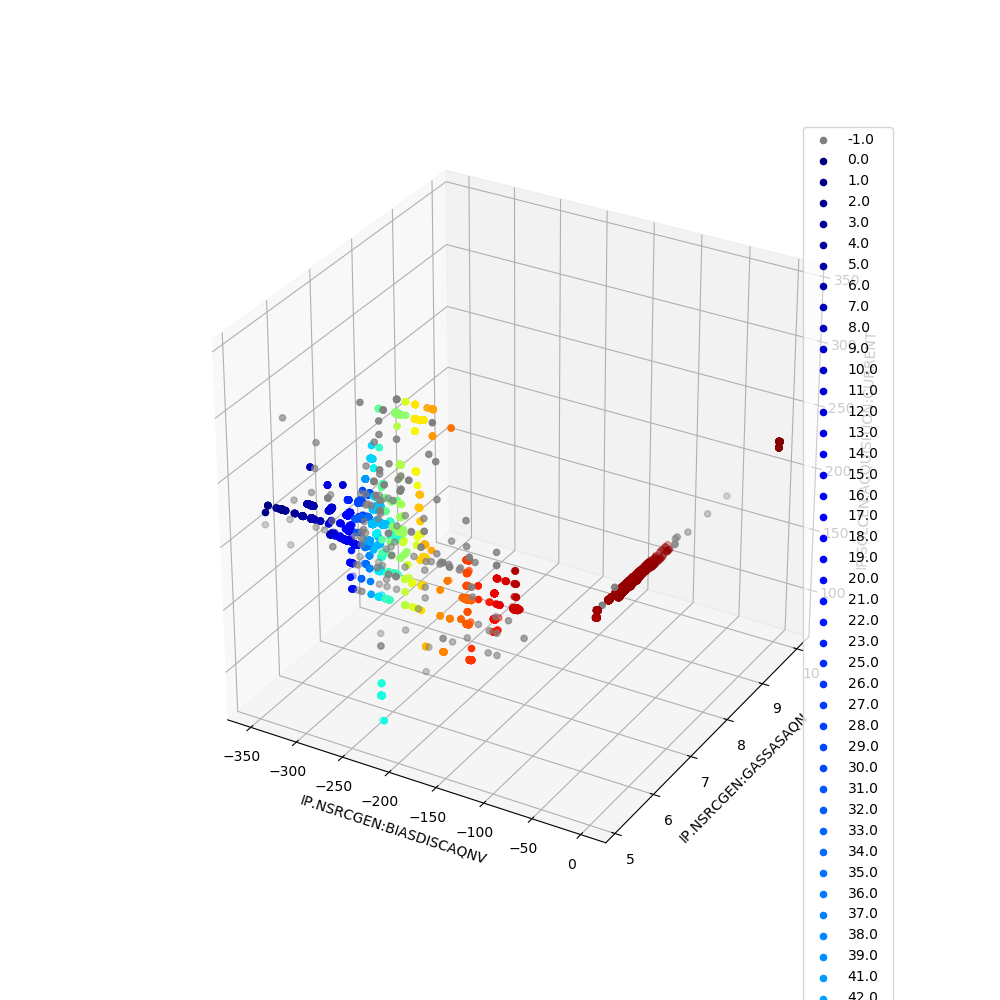

In [127]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('jet', num_clusters)
cmap.set_under('gray')
cmap.set_over('gray')

norm = mpl.colors.Normalize(vmin=0, vmax=num_clusters)
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for (name, group) in df_unstable_sample.groupby('CLUSTER'):
    cax = ax.scatter(group[cols_to_cluster[0]], group[cols_to_cluster[1]], group[cols_to_cluster[2]], marker='o', c=[scalarMap.to_rgba(name)], label=name)

plt.legend() 
    
ax.set_xlabel(cols_to_cluster[0])
ax.set_ylabel(cols_to_cluster[1])
ax.set_zlabel(cols_to_cluster[2])

plt.show()

Now again we will display the five most important clusters and provide a summary below.

In [128]:
described = describe_clusters(cl_df, cols_to_cluster).round(3)

In [129]:
num_of_top_clusters = 5
top_clusters = list(described.head(n=num_of_top_clusters).index)
top_clusters.sort()
df_unstable_sample.loc[df_unstable_sample['CLUSTER'].isin(top_clusters) == False, 'CLUSTER'] = -1

<IPython.core.display.Javascript object>


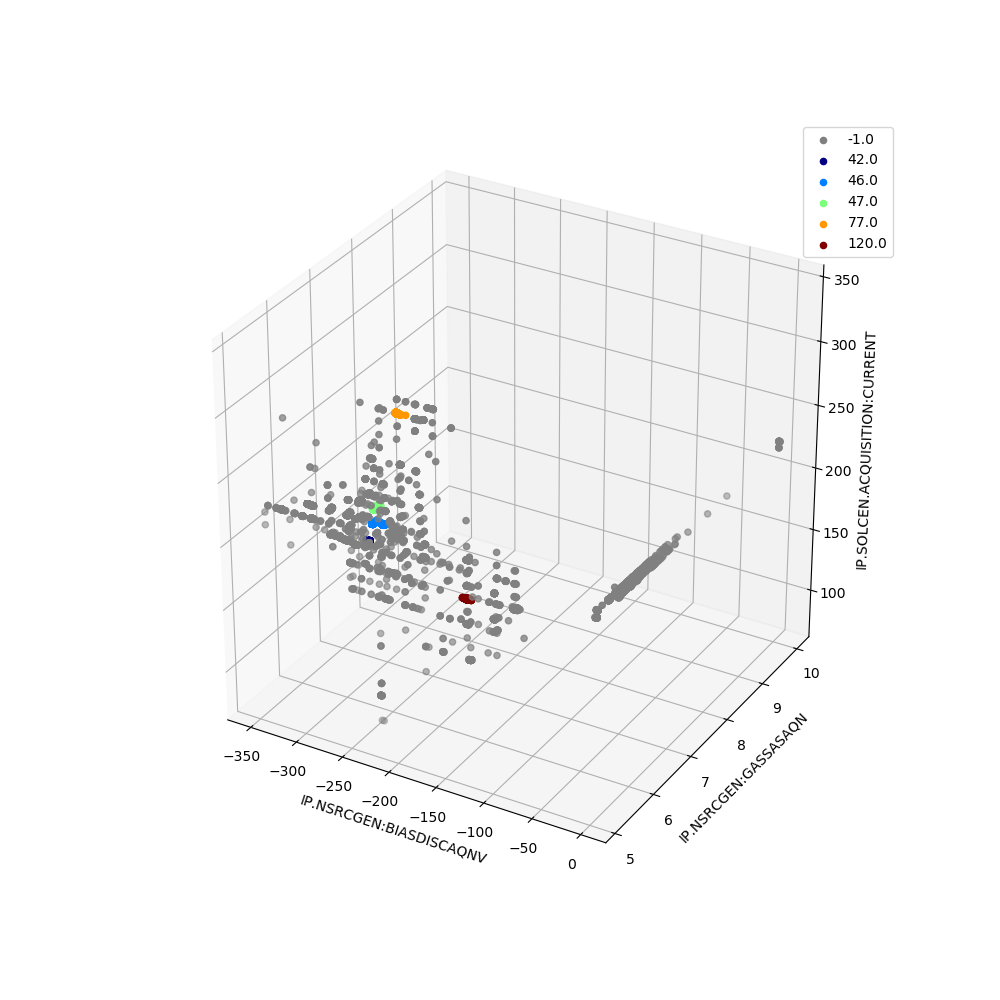

In [130]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('jet', num_of_top_clusters)
cmap.set_under('gray')
cmap.set_over('gray')

norm = mpl.colors.Normalize(vmin=0, vmax=num_of_top_clusters)
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for (name, group) in df_unstable_sample.groupby('CLUSTER'):
    lookup = top_clusters.index(name) if name in top_clusters else -1
    cax = ax.scatter(group[cols_to_cluster[0]], group[cols_to_cluster[1]], group[cols_to_cluster[2]], marker='o', c=[scalarMap.to_rgba(lookup)], label=name)

plt.legend() 
    
ax.set_xlabel(cols_to_cluster[0])
ax.set_ylabel(cols_to_cluster[1])
ax.set_zlabel(cols_to_cluster[2])

plt.show()

In [131]:
described.drop(('DENSITY', 'count'), axis=1).head(n=num_of_top_clusters)

IP.NSRCGEN:BIASDISCAQNV                                          \
                           mean    std varC (%)     min  median     max   
CLUSTER                                                                   
47.0                   -229.222  0.313    0.136 -229.25 -229.25 -225.75   
77.0                   -200.994  0.979    0.487 -204.75 -201.25 -194.25   
120.0                  -136.072  1.950    1.433 -141.75 -134.75 -131.25   
46.0                   -226.101  4.340    1.920 -229.25 -229.25 -218.75   
42.0                   -234.516  1.750    0.746 -236.25 -236.25 -232.75   

        IP.NSRCGEN:GASSASAQN                                       \
                        mean    std varC (%)    min median    max   
CLUSTER                                                             
47.0                   5.279  0.055    1.033  5.166  5.247  5.329   
77.0                   5.166  0.000    0.000  5.166  5.166  5.166   
120.0                  5.247  0.000    0.000  5.247  5.247  5.247   
46.0                   5.193  0.038    0.732  5.166  5.166  5.247   
42.0                   5.166  0.000    0.000  5.166  5.166  5.166   

        IP.SOLCEN.ACQUISITION:CURRENT                                  \
                                 mean  std varC (%)      min   median   
CLUSTER                                                                 
47.0                          250.613  0.0      0.0  250.613  250.613   
77.0                          329.018  0.0      0.0  329.018  329.018   
120.0                         200.209  0.0      0.0  200.209  200.209   
46.0                          239.412  0.0      0.0  239.412  239.412   
42.0                          225.411  0.0      0.0  225.411  225.411   

                 DENSITY  
             max   total  
CLUSTER                   
47.0     250.613   9.299  
77.0     329.018   7.823  
120.0    200.209   6.475  
46.0     239.412   5.842  
42.0     225.411   5.824

### Comparison with DBSCAN
Now, we will compare the results with clusters obtained by the DBSCAN algorithm.

In [97]:
del df

In [98]:
df_stable_dbsample = df_stable[cols_to_cluster].sample(100000).copy()
stable_source_values = df_stable_dbsample.values

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stable_source_values = scaler.fit_transform(stable_source_values)

In [100]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=100)
labels = dbscan.fit_predict(stable_source_values)
df_stable_dbsample['DBSCAN_CLUSTER'] = labels
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise = list(labels).count(-1)

print('Estimated number of clusters: %d' % num_clusters)
print('Estimated number of noise points: %d' % num_noise)

Estimated number of clusters: 34
Estimated number of noise points: 1519


In [101]:
sample = df_stable_dbsample[df_stable_dbsample['DBSCAN_CLUSTER'] != -1].sample(10000)

<IPython.core.display.Javascript object>


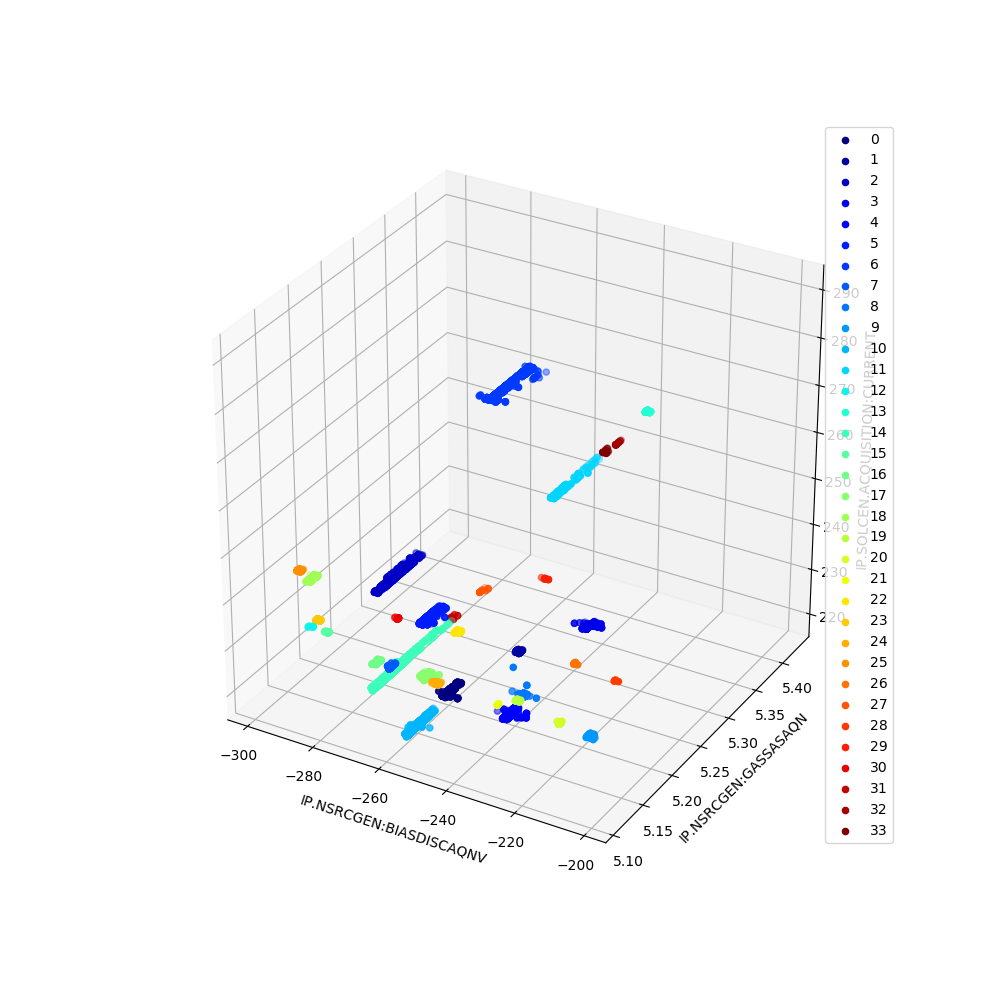

In [102]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('jet', num_clusters)
cmap.set_under('gray')
cmap.set_over('gray')

norm = mpl.colors.Normalize(vmin=0, vmax=num_clusters)
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for (name, group) in sample.groupby('DBSCAN_CLUSTER'):
    cax = ax.scatter(group[cols_to_cluster[0]], group[cols_to_cluster[1]], group[cols_to_cluster[2]], marker='o', c=[scalarMap.to_rgba(name)], label=name)

plt.legend() 
    
ax.set_xlabel(cols_to_cluster[0])
ax.set_ylabel(cols_to_cluster[1])
ax.set_zlabel(cols_to_cluster[2])

plt.show()

In [132]:
df_stable_dbsample.groupby('DBSCAN_CLUSTER').describe().sort_values(by=('IP.NSRCGEN:BIASDISCAQNV', 'count'), ascending=False).round(3)

IP.NSRCGEN:BIASDISCAQNV                                         \
                                 count     mean     std    min     25%    50%   
DBSCAN_CLUSTER                                                                  
 6                             23491.0 -237.673   0.596 -241.0 -238.00 -238.0   
 5                             13020.0 -257.244   0.515 -259.0 -258.00 -257.0   
 4                             11639.0 -238.505   0.612 -242.0 -239.00 -239.0   
 0                             10260.0 -257.641   0.585 -262.0 -258.00 -258.0   
 2                              5686.0 -275.831   0.518 -277.0 -276.00 -276.0   
 7                              4015.0 -271.022   0.173 -272.0 -271.00 -271.0   
 10                             3412.0 -256.434   0.603 -258.0 -257.00 -256.0   
 17                             3380.0 -266.718   0.567 -270.0 -267.00 -267.0   
 3                              3183.0 -219.807   0.840 -224.0 -220.00 -220.0   
 14                             2899.0 -275.505   0.595 -277.0 -276.00 -275.0   
 8                              2720.0 -234.552   0.824 -238.0 -235.00 -234.0   
 1                              2565.0 -229.572   0.495 -230.0 -230.00 -230.0   
 9                              1725.0 -210.408   0.515 -211.0 -211.00 -210.0   
-1                              1519.0 -252.831  27.102 -304.0 -276.00 -249.0   
 22                             1445.0 -247.509   0.500 -248.0 -248.00 -248.0   
 18                             1199.0 -293.562   0.523 -295.0 -294.00 -294.0   
 11                             1014.0 -248.525   0.547 -249.0 -249.00 -249.0   
 25                              977.0 -298.709   0.454 -299.0 -299.00 -299.0   
 20                              976.0 -220.013   0.115 -221.0 -220.00 -220.0   
 23                              884.0 -293.718   0.450 -294.0 -294.00 -294.0   
 24                              729.0 -256.929   0.612 -258.0 -257.00 -257.0   
 19                              596.0 -234.695   0.461 -235.0 -235.00 -235.0   
 16                              549.0 -275.393   0.489 -276.0 -276.00 -275.0   
 13                              407.0 -201.759   0.502 -202.0 -202.00 -202.0   
 15                              242.0 -288.252   0.435 -289.0 -288.75 -288.0   
 30                              215.0 -276.163   0.370 -277.0 -276.00 -276.0   
 21                              194.0 -238.000   0.000 -238.0 -238.00 -238.0   
 26                              184.0 -219.967   0.178 -220.0 -220.00 -220.0   
 12                              181.0 -293.459   0.500 -294.0 -294.00 -293.0   
 29                              140.0 -229.879   0.683 -231.0 -230.00 -230.0   
 28                              126.0 -201.643   0.481 -202.0 -202.00 -202.0   
 32                              112.0 -248.000   0.000 -248.0 -248.00 -248.0   
 31                              108.0 -275.630   0.485 -276.0 -276.00 -276.0   
 27                              105.0 -275.552   0.500 -276.0 -276.00 -276.0   
 33                              103.0 -248.670   0.473 -249.0 -249.00 -249.0   

                             IP.NSRCGEN:GASSASAQN                              \
                  75%    max                count   mean    std    min    25%   
DBSCAN_CLUSTER                                                                  
 6             -237.0 -233.0              23491.0  5.194  0.018  5.148  5.181   
 5             -257.0 -254.0              13020.0  5.153  0.009  5.144  5.147   
 4             -238.0 -234.0              11639.0  5.185  0.005  5.174  5.180   
 0             -257.0 -253.0              10260.0  5.188  0.006  5.178  5.184   
 2             -276.0 -275.0               5686.0  5.203  0.020  5.168  5.187   
 7             -271.0 -270.0               4015.0  5.169  0.003  5.163  5.166   
 10            -256.0 -253.0               3412.0  5.131  0.013  5.111  5.120   
 17            -266.0 -264.0               3380.0  5.200  0.004  5.192  5.197   
 3             -219.0 -217.0               31

### Optigrid
Here we will test our implementation of the Optigrid algorithm

In [18]:
# %load ../ionsrcopt/optigrid.py
""" Implementation of the Optigrid Algorithm described in "Optimal Grid-Clustering: Towards Breaking the Curse of
Dimensionality in High-Dimensional Clustering" by Hinneburg and Keim """

import numpy as np
import random
from sklearn.neighbors import KernelDensity

import matplotlib.pyplot as plt

def estimate_distribution(data, cluster_indices, current_dimension, num_steps, bandwidth = 0.2, percentage_of_values=1):
    num_samples = 5000
    sample_size = min(num_samples, len(cluster_indices))
    sample = random.sample(cluster_indices, sample_size)
    datapoints = [[data[ind][current_dimension]] for ind in sample]
    
    min_val = min(datapoints)
    max_val = max(datapoints)
    grid = np.linspace(min_val, max_val, num_steps)
    
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth, atol=1E-6, rtol=1E-4).fit(datapoints)
    log_dens = kde.score_samples(grid)
    return grid, np.exp(log_dens) * percentage_of_values

def create_cuts(data, cluster_indices, q, max_cut_score, noise_level, current_dimension, bins, percentage_of_values):
    #hist, edges = np.histogram([data[ind][current_dimension] for ind in cluster_indices], density=True, bins=bins[current_dimension]) # First create the histogram of this dimension, 
    #hist = np.append(hist, 0) # adding a zero density at the end to avoid the special case in the next loop, when searching for the maxima
    #hist *= edges[1] - edges[0]

    num_steps = 100
    grid, kde = estimate_distribution(data, cluster_indices, current_dimension, num_steps, bandwidth=0.1, percentage_of_values=percentage_of_values)
     
    plt.plot(grid, kde)
    plt.title("Current dimension: {}".format(current_dimension))
    plt.show()
    
    kde = np.append(kde, 0)

    
    max=[]
    prev = 0
    current = kde[0]
    #current = hist[0]
    for bin in range(1, num_steps+1): #len(bins[current_dimension])):  Find all peaks that are above the noise level
    #for bin in range(len(bins[current_dimension])): # Find all peaks that are above the noise level
        next = kde[bin] #hist[bin]
        #next = hist[bin]
        if current > prev and current > next and current >= noise_level:
            max.append(bin-1)
        prev = current
        current = next
    
    if not max:
        return []

    max = [max[0]] + sorted(sorted(max[1:-1], key=lambda x: kde[x], reverse=True)[:q-1]) + [max[len(max)-1]] # and get the q-1 most important peaks between the leftest and rightest one.
    #max = [max[0]] + sorted(sorted(max[1:-1], key=lambda x: hist[x], reverse=True)[:q-1]) + [max[len(max)-1]] # and get the q-1 most important peaks between the leftest and rightest one.

    best_cuts = [] 
    for i in range(len(max)-1): # between these peaks search for the optimal cutting plane
        current_min = 1
        current_min_index = -1
        for j in range(max[i]+1, max[i+1]):
            if kde[j] < current_min:
            #if hist[j] < current_min:
                current_min = kde[j]
                #current_min = hist[j]
                current_min_index = j
        
        if current_min_index >= 0 and current_min < max_cut_score:
            best_cuts.append((grid[current_min_index], current_dimension, current_min)) # cutting plane format: (cutting coordinate, dimension in which we cut, density at minimum)
            #best_cuts.append(((edges[current_min_index] + edges[current_min_index+1])/2, current_dimension, current_min)) # cutting plane format: (cutting coordinate, dimension in which we cut, density at minimum)
    return best_cuts

def fill_grid(grid, data, cluster_indices, cuts):
    """ Partitions the grid based on the selected cuts and assignes each cell the corresponding data points (as indices)"""
    for ind in cluster_indices:
        grid_index = 0
        value = data[ind]
        for cut in cuts:
            if value[cut[1]] >= cut[0]:
                grid_index += 2 ** cut[2]
        
        grid[grid_index].append(ind)

def create_bins(data, number_of_bins):
    mins = np.nanmin(data, axis=0)
    maxs = np.nanmax(data, axis=0)
    bins = [[mins[j] + i / number_of_bins * (maxs[j] - mins[j]) for i in range(number_of_bins+1)] for j in range(len(mins))]
    for i in range(len(mins)):
        if mins[i] == maxs[i]:
            bins[i] = [mins[i], mins[i]+1]

    return bins

def optigrid(data, d, q, max_cut_score, noise_level, cluster_indices=None, bins=None, number_of_bins=25, percentage_of_values=1):
    """ Main entry point of the algorithm. 

    Parameters:
        data (list of datapoints): The whole set of datapoints to be considered
        cluster_indices (list of int): The currently considered cluster. This is a list of indices with which the datapoints can be looked up in the data list. If None, then the whole set is considered as one cluster, typically whe the algorithm is started.
        d (int): The number of dimensions of the data
        q (int): number of cutting planes in each iteration
        max_cut_score (double): The maximum density (percentage) in the density estimation histograms that will be used when creating cutting planes. The lower the more different peaks will be grouped inside one cluster.
        noise_level (double): The background noise, everything below this threshold will not influence the cutting planes. As percentage of density.
        bins: The bins to use for the histograms in every dimension. If None, then number_of_bins bins will be created per dimension.
    
    Returns:
        list of list of int: Each list in this list represents a cluster. The values are again indices which that the datapoints can be looked up in the data list.
    """
    
    if not bins:
        bins = create_bins(data, number_of_bins)
    if not cluster_indices:
        cluster_indices = list(range(0, len(data)))

    cuts = []
    for i in range(d): # First create all best cuts
        cuts += create_cuts(data, cluster_indices, q, max_cut_score, noise_level, i, bins, percentage_of_values)
    
    if not cuts:
        return [cluster_indices]
    
    cuts = sorted(cuts, key=lambda x: x[2]) # Sort the cuts based on the density at the minima
    cuts = [(cuts[i][0], cuts[i][1], i) for i in range(q)] # and select the q best ones

    grid = [[] for i in range(2 ** q)]
    fill_grid(grid, data, cluster_indices, cuts) # Fill the subgrid based on the cuts

    result = []
    for cluster in grid:
        if not cluster:
            continue
        print(percentage_of_values*len(cluster)/len(cluster_indices))
        result += optigrid(data=data, d=d, q=q, max_cut_score=max_cut_score, noise_level=noise_level, cluster_indices=cluster, bins=bins, percentage_of_values=percentage_of_values*len(cluster)/len(cluster_indices)) # Run Optigrid on every subgrid
    
    return result

In [19]:
from sklearn import preprocessing
data = df_stable[cols_to_cluster].values
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)

In [20]:
#%matplotlib inline

d=len(cols_to_cluster)
q=1
max_cut_score = 0.3
noise_level = 0.1
opt = optigrid(data, d, q, max_cut_score, noise_level, number_of_bins=30)

num_clusters = len(opt)
"Optigrid found {} clusters.".format(num_clusters)

0.7595669087160818
0.6948896960273252
0.037833309229719114
0.657056386797606
0.4788170683065721
0.26246532994470284
0.11829639339309185
0.057188664976036085
0.061107728417055765
0.0267729743522192
0.03433475406483656
0.144168936551611
0.21635173836186922
0.05616433813471187
0.16018740022715733
0.12980302894920828
0.030384371277949053
0.1782393184910339
0.15009750449294437
0.028141813998089515
0.06467721268875662
0.028414015959970184
0.03626319672878644
0.24043309128391815


'Optigrid found 13 clusters.'

In [21]:
labels = [None] * (len(data))
for cluster_ind, cluster in enumerate(opt):
    for el in cluster:
        labels[el] = cluster_ind
df_stable['OPTIGRID_CLUSTER'] = labels

In [22]:
df_stable_sample = df_stable.sample(10000)
#df_stable_sample = df_stable[df_stable['OPTIGRID_CLUSTER'] < 8].sample(10000)

In [23]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('jet', max(2, num_clusters))
cmap.set_under('gray')
cmap.set_over('gray')

norm = mpl.colors.Normalize(vmin=0, vmax=num_clusters)
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for (name, group) in df_stable_sample.groupby('OPTIGRID_CLUSTER'):
    cax = ax.scatter(group[cols_to_cluster[0]], group[cols_to_cluster[1]], group[cols_to_cluster[2]], marker='o', c=[scalarMap.to_rgba(name)], label=name)

plt.legend() 
    
ax.set_xlabel(cols_to_cluster[0])
ax.set_ylabel(cols_to_cluster[1])
ax.set_zlabel(cols_to_cluster[2])

plt.show()

<IPython.core.display.Javascript object>

In [15]:
def describe_cluster(cluster, columns):
    """ Generate descriptive statistics for a cluster

    Parameters:
        cluster (DataFrame): A dataframe, that contains density informations for every bin in the cluster
        columns (list of string): The names of the columns for which to generate statistics

    Returns: 
        Series: All statistics for the selected columns
    """
    
    mean = cluster.mean(axis = 0) 
    std = cluster.std(axis=0)
    quantiles = cluster.quantile(.5, axis=0)
    mins = cluster.min(axis=0)
    maxs = cluster.max(axis=0)
    
    count = cluster.count(axis=0)[0]
    area = np.prod([maxs[i]-mins[i] for i in range(len(columns))])
    
    result_columns = [[mean[i], std[i], std[i] / abs(mean[i]) * 100, mins[i], quantiles[i], maxs[i]] for i in range(len(columns))]
    result = list(itertools.chain(*result_columns)) + [count, count/area if area != 0 else np.nan]
    
    value_columns = [[(col, 'mean'), (col, 'std'), (col, 'varC (%)'), (col, 'min'), (col, 'median'), (col, 'max')] for col in columns]
    index = list(itertools.chain(*value_columns)) + [('DENSITY', 'count'), ('DENSITY', 'per_area')]
    
    return pd.Series(result, index=pd.MultiIndex.from_tuples(index))


def describe_clusters(df, columns):
    """ Summarize all clusters and sort them by density

    Parameters:
        df (DataFrame): A frame containing density and cluster information about every bin
        columns (list of string): The names of the columns for which to generate statistics
    
    Returns:
        DataFrame: Descriptive frame sorted by density
    """

    result = df[columns + ['OPTIGRID_CLUSTER']].groupby('OPTIGRID_CLUSTER').apply(describe_cluster, columns)
    return result.sort_values(('DENSITY', 'count'), ascending=0)

described = describe_clusters(df_stable, cols_to_cluster)

In [16]:
num_of_top_clusters = 5
top_clusters = list(described.head(n=num_of_top_clusters).index)
top_clusters.sort()
df_stable_sample.loc[df_stable_sample['OPTIGRID_CLUSTER'].isin(top_clusters) == False, 'OPTIGRID_CLUSTER'] = -1

<IPython.core.display.Javascript object>


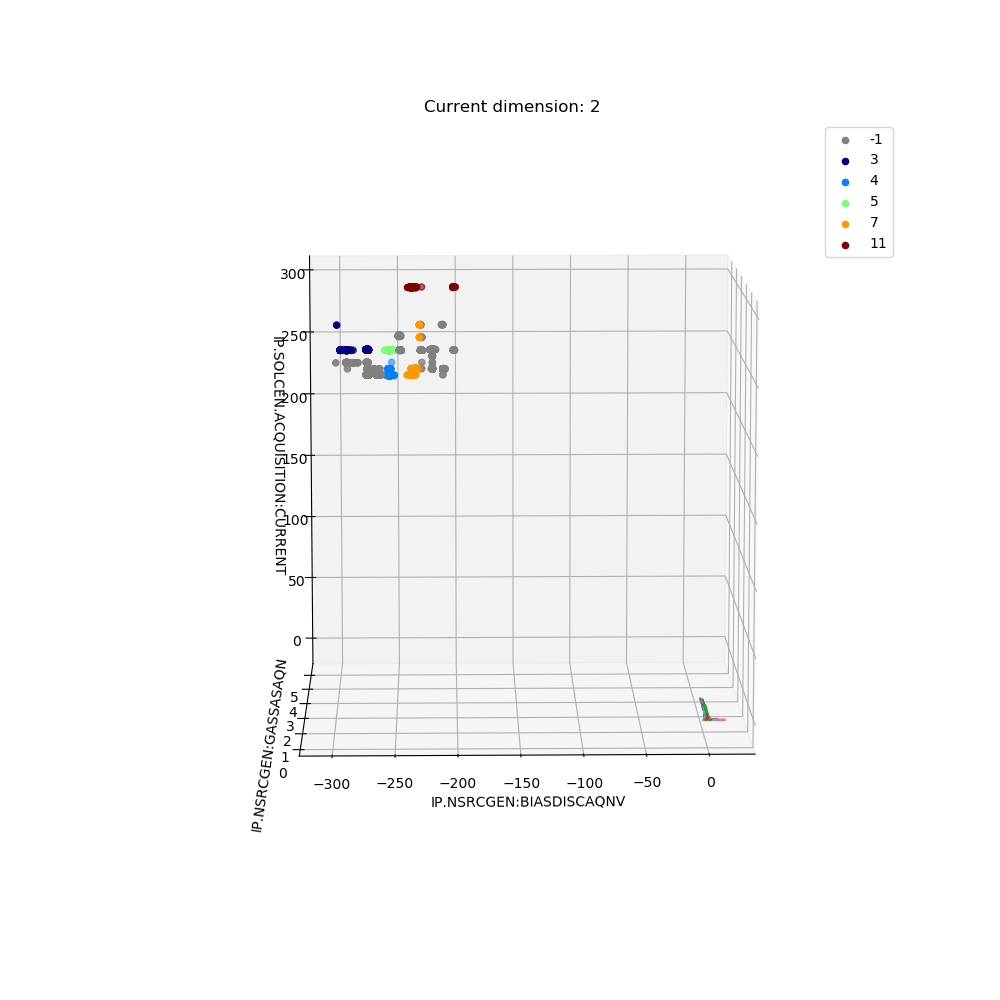

In [17]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('jet', max(2, num_of_top_clusters))
cmap.set_under('gray')
cmap.set_over('gray')

norm = mpl.colors.Normalize(vmin=0, vmax=num_of_top_clusters)
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for (name, group) in df_stable_sample.groupby('OPTIGRID_CLUSTER'):
    lookup = top_clusters.index(name) if name in top_clusters else -1
    cax = ax.scatter(group[cols_to_cluster[0]], group[cols_to_cluster[1]], group[cols_to_cluster[2]], marker='o', c=[scalarMap.to_rgba(lookup)], label=name)

plt.legend() 
    
ax.set_xlabel(cols_to_cluster[0])
ax.set_ylabel(cols_to_cluster[1])
ax.set_zlabel(cols_to_cluster[2])

plt.show()

In [20]:
described.head(n=num_of_top_clusters).round(3)

IP.NSRCGEN:BIASDISCAQNV                                       \
                                    mean    std varC (%)    min median    max   
OPTIGRID_CLUSTER                                                                
8                               -256.266  2.981    1.163 -261.0 -257.0 -247.0   
6                               -257.205  0.864    0.336 -262.0 -257.0 -245.0   
20                              -237.421  0.632    0.266 -240.0 -237.0 -229.0   
17                              -237.851  1.004    0.422 -241.0 -238.0 -211.0   
12                              -238.540  0.593    0.249 -244.0 -239.0 -237.0   

                 IP.NSRCGEN:GASSASAQN                                       \
                                 mean    std varC (%)    min median    max   
OPTIGRID_CLUSTER                                                             
8                               5.153  0.008    0.160  5.144  5.149  5.221   
6                               5.165  0.026    0.494  5.111  5.182  5.188   
20                              5.208  0.002    0.043  5.204  5.209  5.213   
17                              5.167  0.011    0.205  5.148  5.167  5.183   
12                              5.185  0.002    0.040  5.181  5.185  5.189   

                 IP.SOLCEN.ACQUISITION:CURRENT                          \
                                          mean    std varC (%)     min   
OPTIGRID_CLUSTER                                                         
8                                      240.010  0.039    0.016  235.01   
6                                      220.384  1.320    0.599  220.01   
20                                     290.013  0.005    0.002  290.01   
17                                     290.011  0.575    0.198  250.00   
12                                     220.065  0.547    0.249  220.01   

                                   DENSITY                
                  median     max     count      per_area  
OPTIGRID_CLUSTER                                          
8                 240.01  240.01  313129.0  5.809433e+04  
6                 220.01  230.01  230716.0  1.762533e+04  
20                290.01  290.02  205182.0  2.076896e+08  
17                290.01  310.00  138993.0  2.206218e+03  
12                220.01  235.01  128978.0  1.535472e+05